# <center>Exercises</center>

<div class="alert alert-block alert-warning">
    <b>Exercise 1:</b> Get WDI data on <b>patent applications by residents and non-residents in each country</b>. Create a new variable that shows the total patents for each country.
</div>

In [8]:
from pandas_datareader import wb

# Define the indicators for patent applications by residents and non-residents
indicators = {'IP.PAT.RESD': 'Patent Applications by Residents',
              'IP.PAT.NRES': 'Patent Applications by Non-Residents'}

# Fetch data from World Bank
world_bank_data = wb.download(indicator=indicators, country='all', start=2010, end=2020)

# Rename columns for easier access
world_bank_data.columns = ['Patent Applications by Residents', 'Patent Applications by Non-Residents']

# Sum patent applications by residents and non-residents to get total patents
world_bank_data['Total Patents'] = world_bank_data['Patent Applications by Residents'] + world_bank_data['Patent Applications by Non-Residents']

# Display the first few rows of the dataset
print(world_bank_data.head())

                                  Patent Applications by Residents  \
country                     year                                     
Africa Eastern and Southern 2020                               NaN   
                            2019                               NaN   
                            2018                               NaN   
                            2017                               NaN   
                            2016                               NaN   

                                  Patent Applications by Non-Residents  \
country                     year                                         
Africa Eastern and Southern 2020                                   NaN   
                            2019                                   NaN   
                            2018                                   NaN   
                            2017                                   NaN   
                            2016                                 

<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Using the <code>my_xy_plot</code> function plot the relation between <b>GDP per capita</b> and <b>total patents</b> in the years 1990, 1995, 2000, 2010, 2020.
</div>

1990


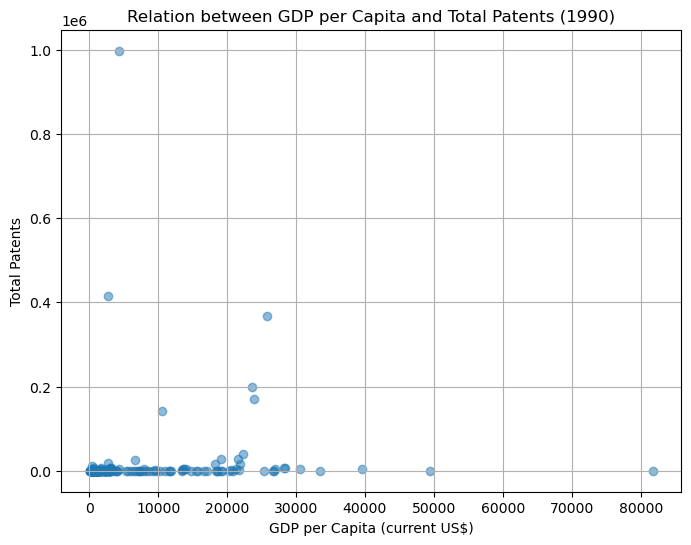

1995


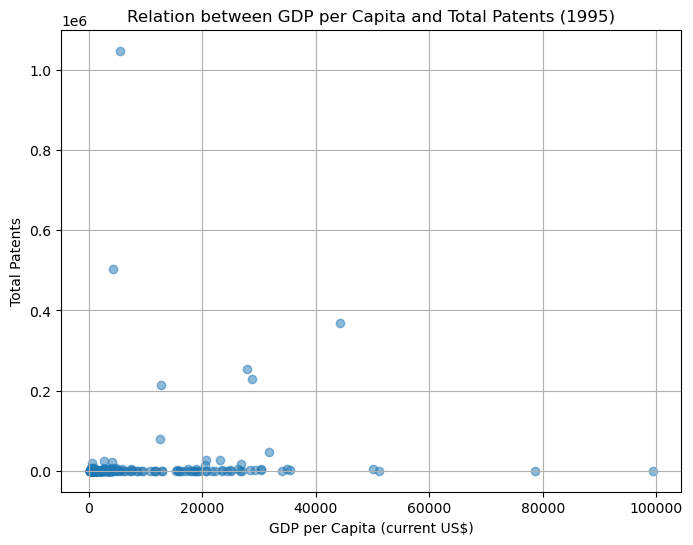

2000


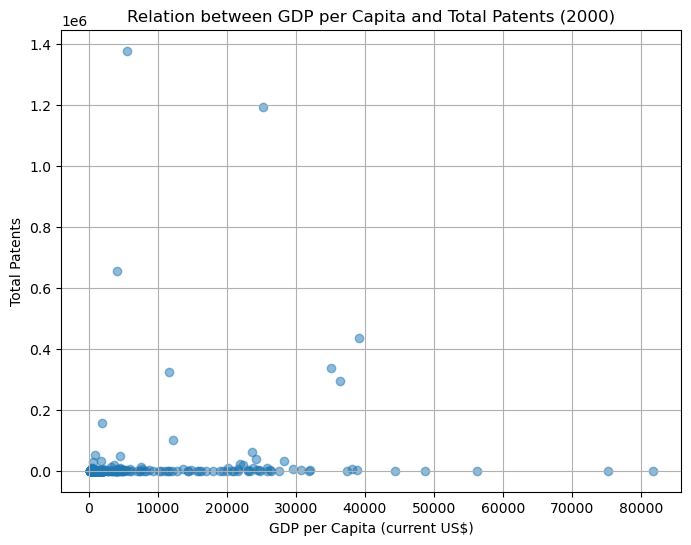

2010


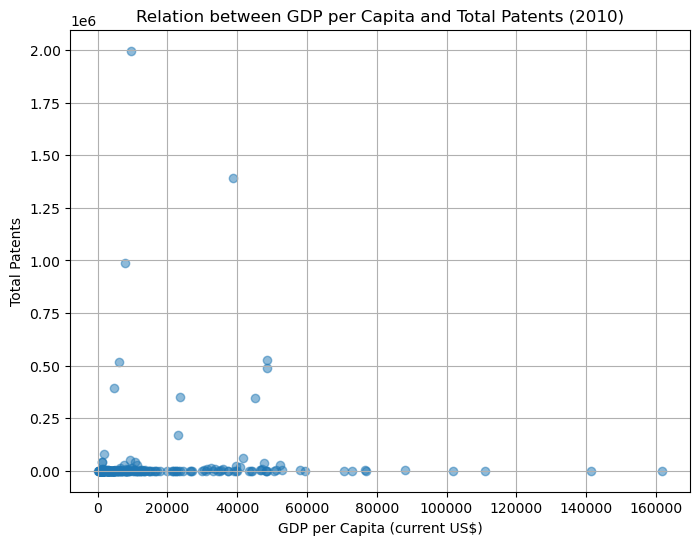

2020


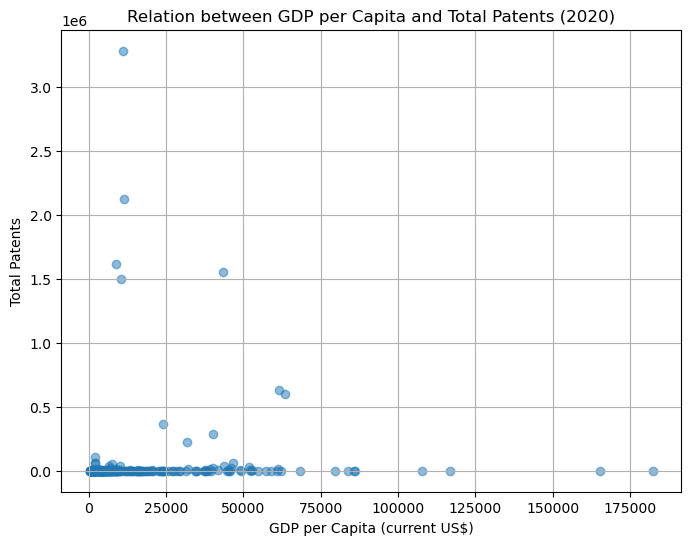

In [26]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr

def my_xy_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Years to plot
years = [1990, 1995, 2000, 2010, 2020]

for year in years:
    print(year)
    # Fetch GDP per capita data
    gdp_per_capita_data = pdr.wb.download(indicator='NY.GDP.PCAP.CD', country='all', start=year, end=year)
    gdp_per_capita_data.columns = ['GDP per Capita']
    
    # Fetch total patents data
    total_patents_data = pdr.wb.download(indicator={'IP.PAT.RESD': 'Patent Applications by Residents',
                                                     'IP.PAT.NRES': 'Patent Applications by Non-Residents'},
                                          country='all', start=year, end=year)
    total_patents_data.columns = ['Patent Applications by Residents', 'Patent Applications by Non-Residents']
    total_patents_data['Total Patents'] = total_patents_data.sum(axis=1)
    
    # Plot relation between GDP per capita and total patents
    my_xy_plot(gdp_per_capita_data['GDP per Capita'], total_patents_data['Total Patents'],
               xlabel='GDP per Capita (current US$)', ylabel='Total Patents',
               title=f'Relation between GDP per Capita and Total Patents ({year})')

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Using the <code>my_xy_line_plot</code> function plot the evolution of <b>GDP per capita</b> and <b>total patents</b> by income groups and regions (separate figures).
</div>

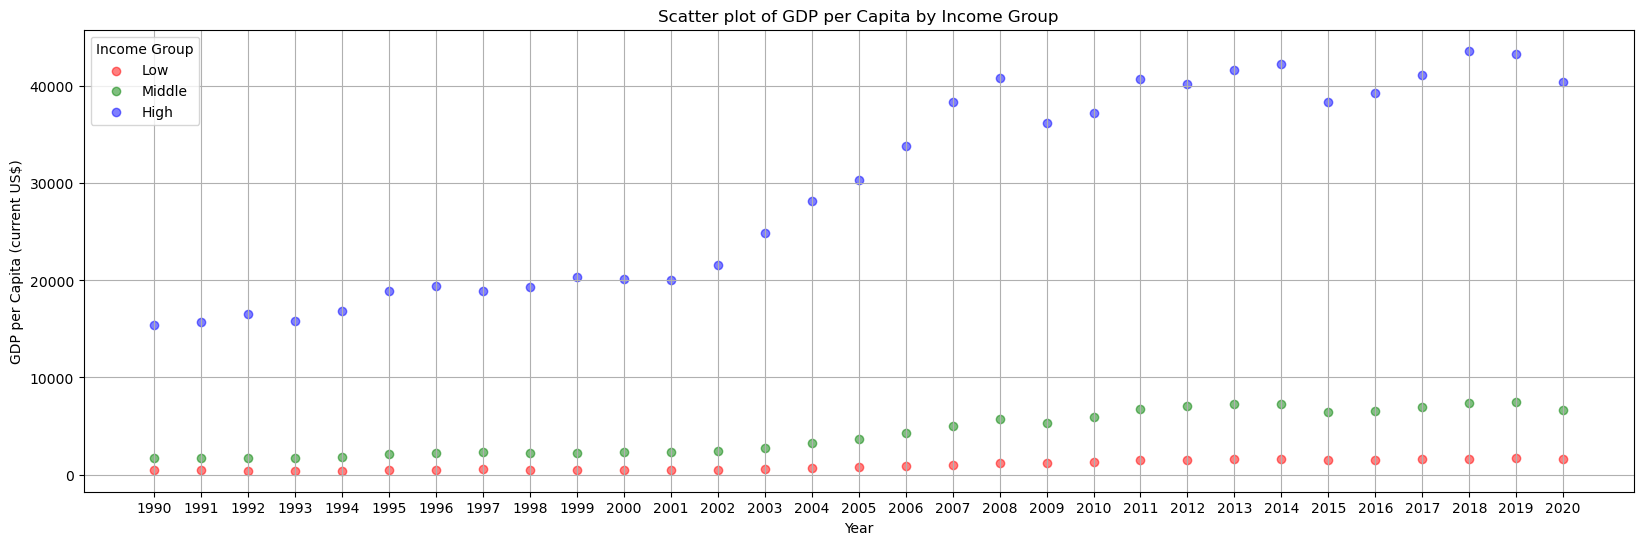

In [77]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd

def my_xy_scatter_plot(data, xlabel, ylabel, title):
    plt.figure(figsize=(20, 6))  # Adjust the figure size for wider graph
    colors = ['red', 'green', 'blue']  # Define colors for low, middle, and high income groups
    for i, group in enumerate(data.columns):
        plt.scatter(data.index, data[group], label=group, color=colors[i], alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Income Group')
    plt.grid(True)
    plt.show()

# Fetch GDP per capita data
gdp_per_capita_data = pdr.wb.download(indicator='NY.GDP.PCAP.CD', country='all', start=1990, end=2020)
gdp_per_capita_data.reset_index(inplace=True)

# Initialize an empty DataFrame to store categorized income data
income_levels_data = pd.DataFrame(columns=['year', 'Income Group', 'GDP per Capita'])

# Iterate over unique years
for year in gdp_per_capita_data['year'].unique():
    # Filter GDP per capita data for the specific year
    gdp_per_capita_year_data = gdp_per_capita_data[gdp_per_capita_data['year'] == year]
    # Categorize income into low, middle, and high based on equidistant groups for the specific year
    income_levels = pd.qcut(gdp_per_capita_year_data['NY.GDP.PCAP.CD'], q=3, labels=['Low', 'Middle', 'High'])
    # Merge income levels with GDP per capita data for the specific year
    income_levels_data = pd.concat([income_levels_data, pd.DataFrame({'year': year,
                                                                      'Income Group': income_levels,
                                                                      'GDP per Capita': gdp_per_capita_year_data['NY.GDP.PCAP.CD']})])

# Merge income group with total patents data
total_patents_data = pdr.wb.download(indicator={'IP.PAT.RESD': 'Patent Applications by Residents',
                                                 'IP.PAT.NRES': 'Patent Applications by Non-Residents'},
                                      country='all', start=1990, end=2020)
total_patents_data.columns = ['Patent Applications by Residents', 'Patent Applications by Non-Residents']
total_patents_data['Total Patents'] = total_patents_data.sum(axis=1)
total_patents_data.reset_index(inplace=True)

total_patents_data = pd.merge(total_patents_data, income_levels_data, on=['year'], how='left')

# Plot scatter plot for GDP per capita by income group
gdp_per_capita_by_income = income_levels_data.pivot_table(index='year', columns='Income Group', values='GDP per Capita')
my_xy_scatter_plot(gdp_per_capita_by_income, xlabel='Year', ylabel='GDP per Capita (current US$)',
                   title='Scatter plot of GDP per Capita by Income Group')


In [79]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd

def my_xy_scatter_plot(data, xlabel, ylabel, title):
    plt.figure(figsize=(20, 6))  # Adjust the figure size for wider graph
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown','pink','grey']  # Define colors for each region
    for i, group in enumerate(data.columns):
        plt.scatter(data.index, data[group], label=group, color=colors[i], alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Region')
    plt.grid(True)
    plt.show()

# Fetch country and region data
countries_data = pdr.wb.get_countries()
countries_data.reset_index(inplace=True)
countries_data['country']=countries_data['name']


In [80]:
countries_data['country'] = countries_data['country'].str.strip()  # Strip white spaces from country names

# Fetch GDP per capita data
gdp_per_capita_data = pdr.wb.download(indicator='NY.GDP.PCAP.CD', country='all', start=1990, end=2020)
gdp_per_capita_data.reset_index(inplace=True)
gdp_per_capita_data['country'] = gdp_per_capita_data['country'].str.strip()  # Strip white spaces from country names
print(gdp_per_capita_data.columns)
print(countries_data.columns)


Index(['country', 'year', 'NY.GDP.PCAP.CD'], dtype='object')
Index(['index', 'iso3c', 'iso2c', 'name', 'region', 'adminregion',
       'incomeLevel', 'lendingType', 'capitalCity', 'longitude', 'latitude',
       'country'],
      dtype='object')


In [81]:
# Merge GDP per capita data with region data
gdp_per_capita_data = pd.merge(gdp_per_capita_data, countries_data[['country', 'region']], on='country', how='left')

gdp_per_capita_data["region"].nunique()

8

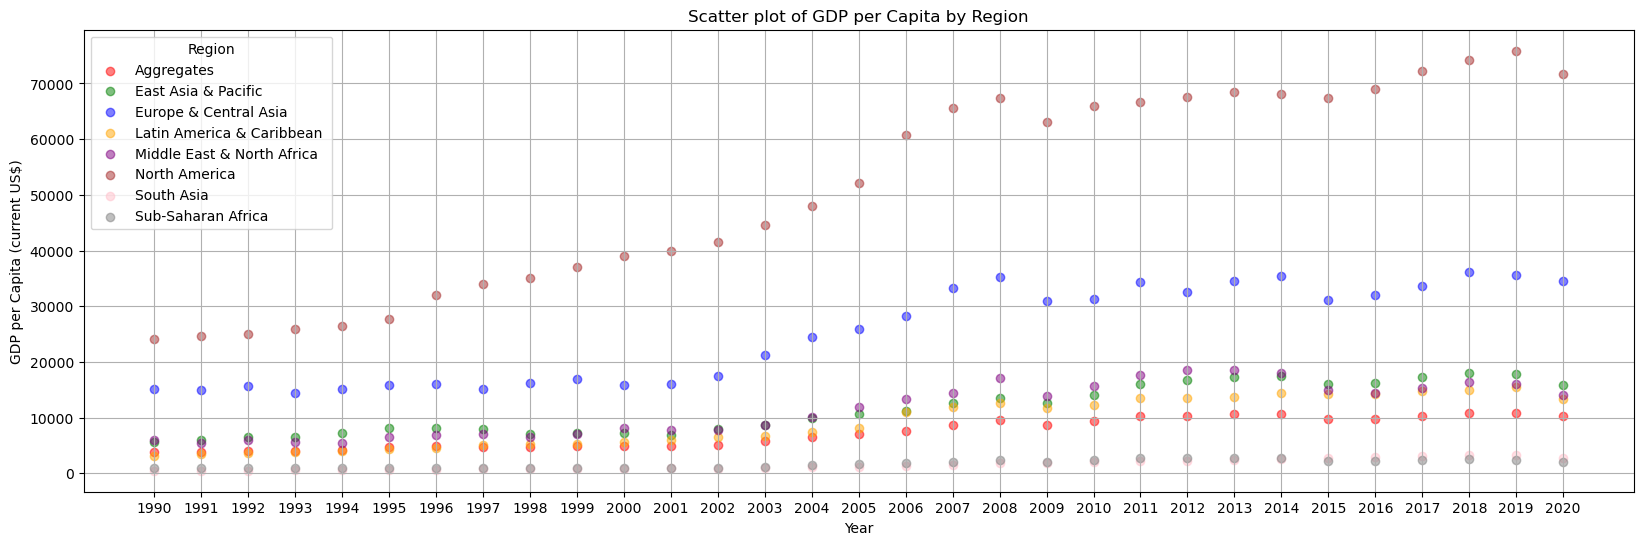

In [82]:
# Plot scatter plot for GDP per capita by region
gdp_per_capita_by_region = gdp_per_capita_data.pivot_table(index='year', columns='region', values='NY.GDP.PCAP.CD')
my_xy_scatter_plot(gdp_per_capita_by_region, xlabel='Year', ylabel='GDP per Capita (current US$)',
                   title='Scatter plot of GDP per Capita by Region')

<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Plot the relation between patenting activity by <b>residents and non-residents</b> in the year 2015. Make sure to show the 45 degree line so you can see how similar they are.
</div>

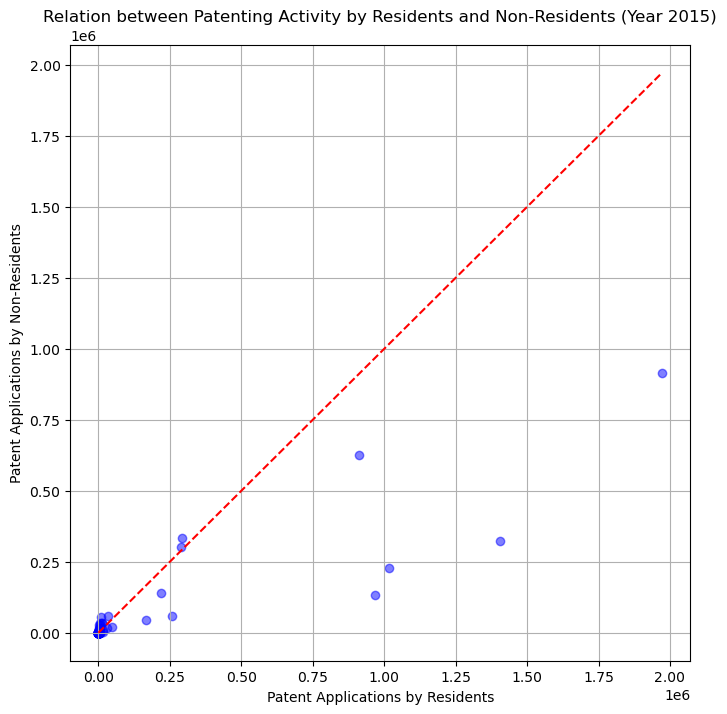

In [83]:
total_patents_data = pdr.wb.download(indicator={'IP.PAT.RESD': 'Patent Applications by Residents',
                                                 'IP.PAT.NRES': 'Patent Applications by Non-Residents'},
                                      country='all', start=2015, end=2015)
total_patents_data.columns = ['Patent Applications by Residents', 'Patent Applications by Non-Residents']


plt.figure(figsize=(8, 8))
plt.scatter(total_patents_data['Patent Applications by Residents'], total_patents_data['Patent Applications by Non-Residents'], color='blue', alpha=0.5)
plt.plot([0, max(total_patents_data.max())], [0, max(total_patents_data.max())], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Patent Applications by Residents')
plt.ylabel('Patent Applications by Non-Residents')
plt.title('Relation between Patenting Activity by Residents and Non-Residents (Year 2015)')
plt.grid(True)
plt.show()


<div class="alert alert-block alert-warning">
<b>Exercise 5:</b> Create a static and a dynamic map for patenting activity in the year 2015 across the world. 
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Explore the relation between economic development as measured by Log[GDP per capita] and patenting activity. Show the relation for residents, non-residents, and total, all in one nice looking table. Also, produce a few nice looking figures.
</div>

Notebook written by [Ömer Özak](http://omerozak.com) for his students in Economics at [Southern Methodist University](http://www.smu.edu). Feel free to use, distribute, or contribute.

[<center><img src="https://github.com/measuring-culture/Expanding-Measurement-Culture-Facebook-JRSI/blob/main/pics/SMUlogowWordmarkRB.jpg?raw=true" width="250"></center>](http://omerozak.com)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c31cec1a-e3fe-4097-ac4f-1073d72ebf20' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>